### Imports

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split

### Load the data

In [2]:
# Function to load and preprocess images
def load_images(data_dir, categories, img_size=32):
    images = []
    labels = []
    for category in categories:
        path = os.path.join(data_dir, category)
        class_num = categories.index(category)
        for img_name in os.listdir(path):
            try:
                img_path = os.path.join(path, img_name)
                img_array = cv2.imread(img_path)
                img_array = cv2.resize(img_array, (img_size, img_size))
                images.append(img_array)
                labels.append(class_num)
            except Exception as e:
                print(f"Error loading image {img_name}: {e}")
                continue
    images = np.array(images) / 255.0  # Normalize pixel values
    labels = np.array(labels)
    return images, labels

data_dir = "flower_images"
categories = ["Lilly", "Lotus", "Orchid", "Sunflower", "Tulip"]

images, labels = load_images(data_dir, categories)

In [3]:
# Split data
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

### Training Model_1

In [4]:
# Build the CNN model
model_1 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(categories), activation='softmax')
])

c:\Users\pasca\VS Code Projekte\FS24\ML II\image_classifications\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Compile the model
model_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# Train the model
history = model_1.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_val, y_val))

Epoch 1/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.3657 - loss: 1.4067 - val_accuracy: 0.5440 - val_loss: 1.1845
Epoch 2/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5136 - loss: 1.1694 - val_accuracy: 0.5440 - val_loss: 1.1062
Epoch 3/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5774 - loss: 1.0508 - val_accuracy: 0.5667 - val_loss: 1.0352
Epoch 4/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6039 - loss: 0.9846 - val_accuracy: 0.6427 - val_loss: 0.9225
Epoch 5/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6670 - loss: 0.8613 - val_accuracy: 0.6320 - val_loss: 0.8904
Epoch 6/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7028 - loss: 0.7497 - val_accuracy: 0.6653 - val_loss: 0.8529
Epoch 7/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7285 - loss: 0.6923 - val_accuracy: 0.6773 - val_loss: 0.8442
Epoch 8/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7816 - loss: 0.6051 - val_accuracy: 0.

24/24 - 0s - 3ms/step - accuracy: 0.7720 - loss: 0.6577
Test accuracy: 0.7720000147819519


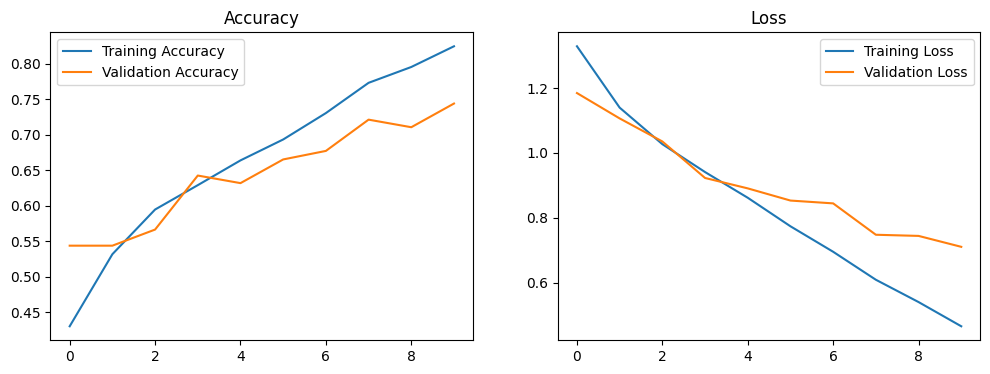

In [6]:
# Evaluate the model on the test set
test_loss, test_acc = model_1.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

### Training Model_2

In [7]:
# Build the CNN model
model_2 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(len(categories), activation='softmax')
])

### First Training

In [8]:
# Compile the model
model_2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# Train the model
history = model_2.fit(X_train, y_train, epochs=50, 
                    validation_data=(X_val, y_val))

Epoch 1/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.3087 - loss: 1.4956 - val_accuracy: 0.4253 - val_loss: 1.3140
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4230 - loss: 1.3111 - val_accuracy: 0.4707 - val_loss: 1.2144
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5210 - loss: 1.1385 - val_accuracy: 0.5613 - val_loss: 1.1027
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5621 - loss: 1.0600 - val_accuracy: 0.5947 - val_loss: 0.9961
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6254 - loss: 0.9763 - val_accuracy: 0.5867 - val_loss: 0.9991
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6356 - loss: 0.9150 - val_accuracy: 0.5960 - val_loss: 0.9595
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6650 - loss: 0.8393 - val_accuracy: 0.6227 - val_loss: 0.9179
Epoch 8/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6955 - loss: 0.7717 - val_accuracy: 0

24/24 - 0s - 3ms/step - accuracy: 0.8107 - loss: 1.1968
Test accuracy: 0.8106666803359985


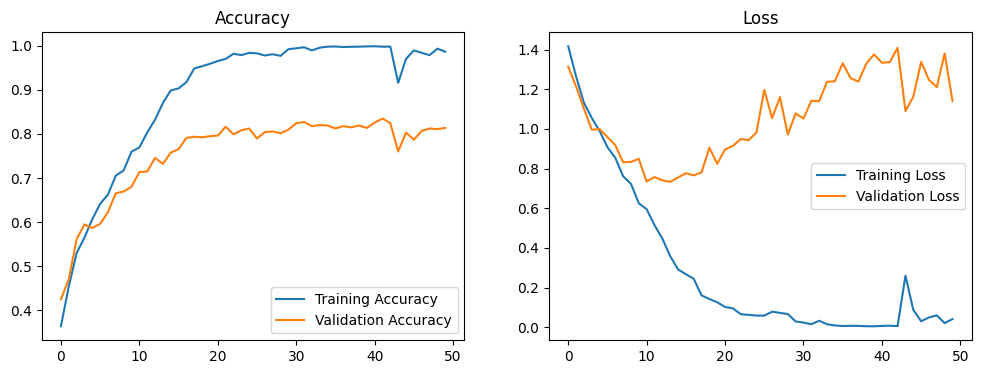

In [9]:
# Evaluate the model on the test set
test_loss, test_acc = model_2.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

### Training Model_3

In [10]:
# Build the CNN model
model_3 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(categories), activation='softmax')
])

In [11]:
# Compile the model
model_3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# Train the model
history = model_3.fit(X_train, y_train, epochs=30, 
                    validation_data=(X_val, y_val))

Epoch 1/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3679 - loss: 1.4386 - val_accuracy: 0.4813 - val_loss: 1.2322
Epoch 2/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4949 - loss: 1.1973 - val_accuracy: 0.5693 - val_loss: 1.1054
Epoch 3/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5750 - loss: 1.0607 - val_accuracy: 0.5160 - val_loss: 1.0956
Epoch 4/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6131 - loss: 0.9635 - val_accuracy: 0.5960 - val_loss: 0.9596
Epoch 5/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6472 - loss: 0.8924 - val_accuracy: 0.6440 - val_loss: 0.9055
Epoch 6/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6894 - loss: 0.8056 - val_accuracy: 0.6333 - val_loss: 0.9168
Epoch 7/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7282 - loss: 0.7256 - val_accuracy: 0.6587 - val_loss: 0.8664
Epoch 8/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7380 - loss: 0.6627 - val_accuracy: 0.

24/24 - 0s - 4ms/step - accuracy: 0.8280 - loss: 0.9299
Test accuracy: 0.828000009059906


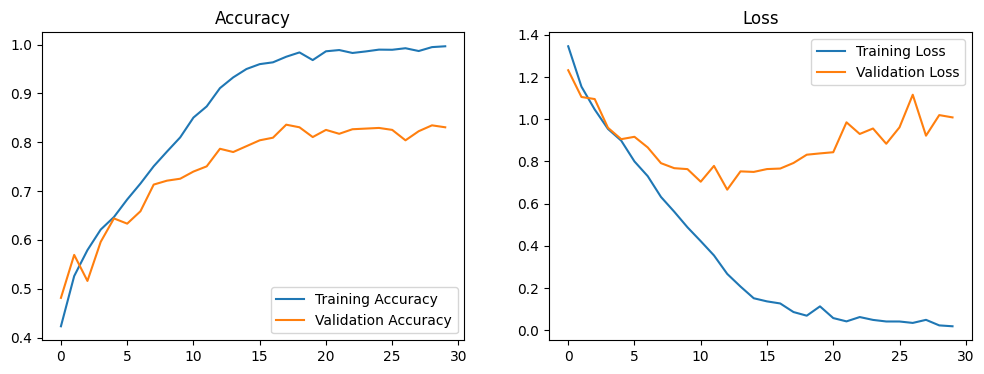

In [12]:
# Evaluate the model on the test set
test_loss, test_acc = model_3.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

### Training Model_4

In [13]:
# Build the CNN model
model_4 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(len(categories), activation='softmax')
])

In [14]:
# Compile the model
model_4.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# Train the model
history = model_4.fit(X_train, y_train, epochs=50, 
                    validation_data=(X_val, y_val))

Epoch 1/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.3456 - loss: 1.4603 - val_accuracy: 0.4787 - val_loss: 1.2350
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5241 - loss: 1.1364 - val_accuracy: 0.5840 - val_loss: 1.0388
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5979 - loss: 1.0231 - val_accuracy: 0.6093 - val_loss: 0.9515
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6462 - loss: 0.9250 - val_accuracy: 0.6520 - val_loss: 0.8967
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6967 - loss: 0.7899 - val_accuracy: 0.6360 - val_loss: 0.9145
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7277 - loss: 0.7241 - val_accuracy: 0.6787 - val_loss: 0.8213
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7270 - loss: 0.6852 - val_accuracy: 0.6933 - val_loss: 0.7572
Epoch 8/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7887 - loss: 0.5574 - val_accuracy: 0.

24/24 - 0s - 4ms/step - accuracy: 0.8307 - loss: 1.1392
Test accuracy: 0.8306666612625122


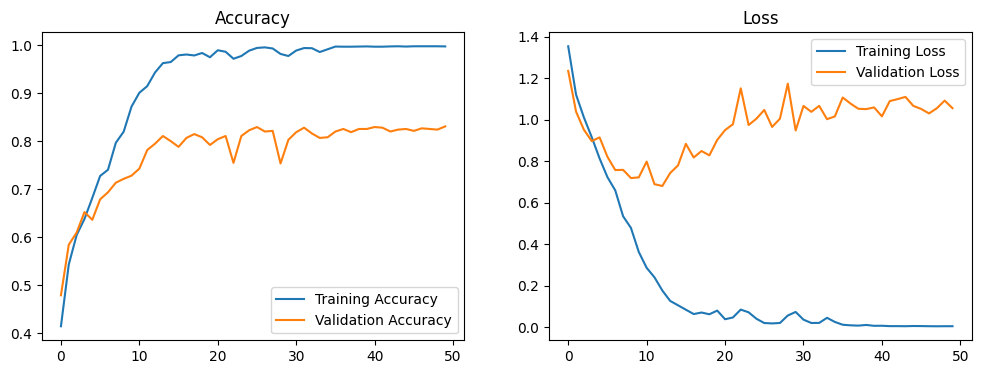

In [15]:
# Evaluate the model on the test set
test_loss, test_acc = model_4.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

### Further Fine-Tuning To Prevent Overfitting

In [16]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)

In [18]:
# Build the CNN model with dropout and batch normalization
model_5 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(len(categories), activation='softmax')
])

In [19]:
# Callback for reducing learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Compile the model with initial learning rate
initial_learning_rate = 0.001
optimizer = Adam(learning_rate=initial_learning_rate)
model_5.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [20]:
# Train the model with the data generator, early stopping, and reduce learning rate callback
history = model_5.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_val, y_val),
                    epochs=50,
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/50
  4/110 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.2201 - loss: 2.5118

c:\Users\pasca\VS Code Projekte\FS24\ML II\image_classifications\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


110/110 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.3086 - loss: 2.1873 - val_accuracy: 0.2507 - val_loss: 1.6008 - learning_rate: 0.0010
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.3970 - loss: 1.7182 - val_accuracy: 0.2773 - val_loss: 1.5234 - learning_rate: 0.0010
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.4367 - loss: 1.4482 - val_accuracy: 0.3027 - val_loss: 1.4657 - learning_rate: 0.0010
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.4750 - loss: 1.3766 - val_accuracy: 0.4853 - val_loss: 1.2107 - learning_rate: 0.0010
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5050 - loss: 1.2499 - val_accuracy: 0.4973 - val_loss: 1.1501 - learning_rate: 0.0010
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5015 - loss: 1.2440 - val_accuracy: 0.4907 - val_loss: 1.2172 - learning_rate: 0.0010
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.5131 - loss: 1.2110 - val_

24/24 - 0s - 3ms/step - accuracy: 0.6533 - loss: 0.9118
Test accuracy: 0.653333306312561


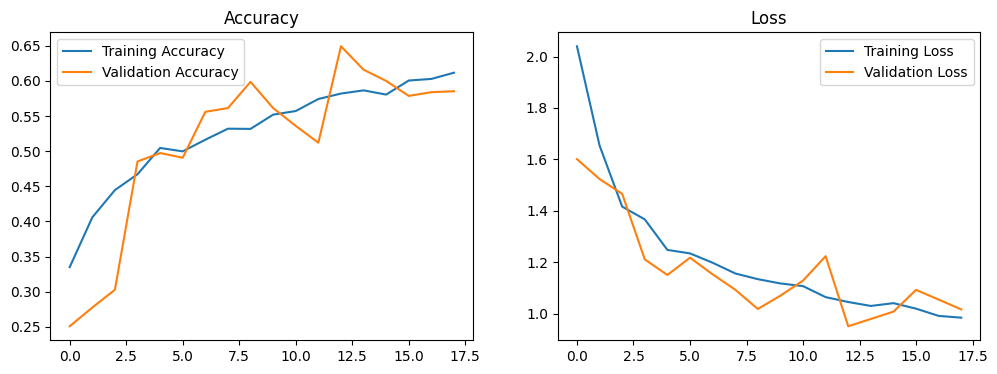

In [21]:
# Evaluate the model on the test set
test_loss, test_acc = model_5.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

### Last Finetuning to get better Accuracy

In [22]:
# Build the CNN model with dropout and batch normalization
model_6 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(63, activation='relu'),
    layers.Dense(62, activation='relu'),
    layers.Dense(61, activation='relu'),
    layers.Dense(60, activation='relu'),
    layers.Dense(59, activation='relu'),
    layers.Dense(58, activation='relu'),
    layers.Dense(len(categories), activation='softmax')
])

In [23]:
# Callback for reducing learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Compile the model with initial learning rate
initial_learning_rate = 0.001
optimizer = Adam(learning_rate=initial_learning_rate)
model_6.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [24]:
# Callback for reducing learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Compile the model with initial learning rate
initial_learning_rate = 0.001
optimizer = Adam(learning_rate=initial_learning_rate)
model_6.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [25]:
# Train the model with the data generator, early stopping, and reduce learning rate callback
history = model_6.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_val, y_val),
                    epochs=100,
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.2671 - loss: 1.5312 - val_accuracy: 0.3973 - val_loss: 1.3154 - learning_rate: 0.0010
Epoch 2/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.4047 - loss: 1.3159 - val_accuracy: 0.4307 - val_loss: 1.2118 - learning_rate: 0.0010
Epoch 3/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.4374 - loss: 1.2765 - val_accuracy: 0.4267 - val_loss: 1.3182 - learning_rate: 0.0010
Epoch 4/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.4821 - loss: 1.1982 - val_accuracy: 0.5280 - val_loss: 1.2174 - learning_rate: 0.0010
Epoch 5/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5137 - loss: 1.1424 - val_accuracy: 0.5587 - val_loss: 1.1019 - learning_rate: 0.0010
Epoch 6/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5138 - loss: 1.1284 - val_accuracy: 0.5320 - val_loss: 1.1564 - learning_rate: 0.0010
Epoch 7/100
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5523 - l

24/24 - 0s - 3ms/step - accuracy: 0.7400 - loss: 0.6348
Test accuracy: 0.7400000095367432


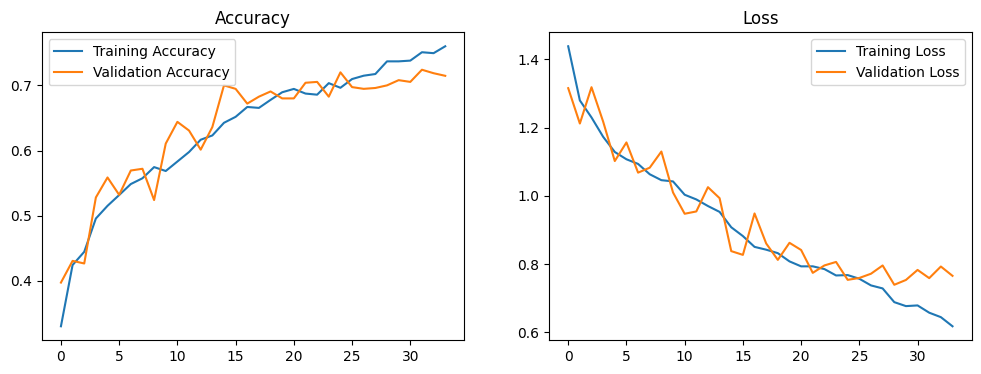

In [26]:
# Evaluate the model on the test set
test_loss, test_acc = model_6.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

### Using Search Algorithms to find the best combinations of layers

In [28]:
import kerastuner as kt
from tensorflow.keras.regularizers import l2

C:\Users\pasca\AppData\Local\Temp\ipykernel_17464\3021148511.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [27]:
# Enhanced Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)

In [29]:
# Model Builder function
def model_builder(hp):
    model = models.Sequential()
    model.add(layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values=[3, 5]),
        activation='relu',
        input_shape=(32, 32, 3)
    ))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values=[3, 5]),
        activation='relu'
    ))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(
        filters=hp.Int('conv_3_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_3_kernel', values=[3, 5]),
        activation='relu'
    ))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    
    # Tune the number of units in the Dense layer
    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    model.add(layers.Dense(units=hp_units, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)))

    model.add(layers.Dense(len(categories), activation='softmax'))
    
    # Tune the learning rate for the optimizer
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    
    model.compile(optimizer=Adam(learning_rate=hp_learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [31]:
# Initialize Keras Tuner
tuner = kt.RandomSearch(
    model_builder,
    objective='val_accuracy',
    max_trials=20,
    executions_per_trial=2,
    directory='my_dir',
    project_name='flower_classification'
)

# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Run the hyperparameter search
tuner.search(datagen.flow(X_train, y_train, batch_size=32), epochs=50, validation_data=(X_val, y_val),
             callbacks=[reduce_lr, early_stopping])


Trial 20 Complete [00h 00m 02s]

Best val_accuracy So Far: 0.745333343744278
Total elapsed time: 00h 52m 44s


### Evaluation

Epoch 1/50


c:\Users\pasca\VS Code Projekte\FS24\ML II\image_classifications\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  3/110 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.1997 - loss: 2.2536

c:\Users\pasca\VS Code Projekte\FS24\ML II\image_classifications\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.3587 - loss: 1.8818 - val_accuracy: 0.2040 - val_loss: 1.7819 - learning_rate: 0.0010
Epoch 2/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.4404 - loss: 1.5686 - val_accuracy: 0.3147 - val_loss: 1.6796 - learning_rate: 0.0010
Epoch 3/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.4578 - loss: 1.4580 - val_accuracy: 0.2813 - val_loss: 1.6038 - learning_rate: 0.0010
Epoch 4/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.4927 - loss: 1.3779 - val_accuracy: 0.5267 - val_loss: 1.3636 - learning_rate: 0.0010
Epoch 5/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.4929 - loss: 1.3301 - val_accuracy: 0.5507 - val_loss: 1.1968 - learning_rate: 0.0010
Epoch 6/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.5078 - loss: 1.2543 - val_accuracy: 0.4307 - val_loss: 1.3713 - learning_rate: 0.0010
Epoch 7/50
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.4977 - loss: 1.2570 - val_

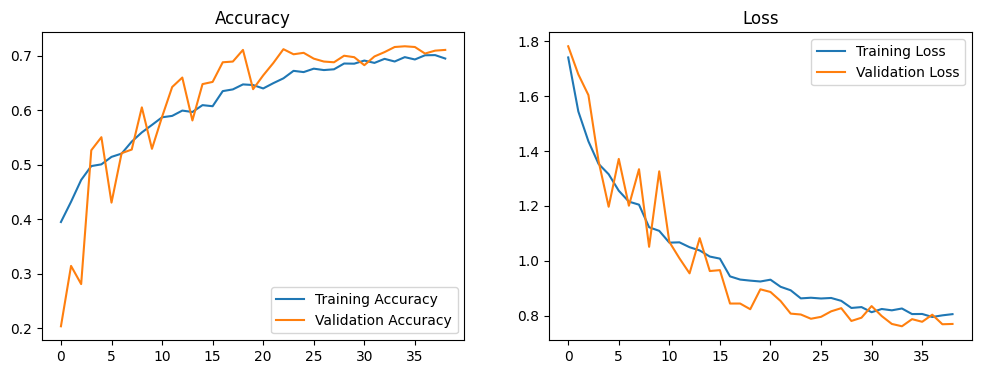

In [32]:
# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the optimal hyperparameters
model_7 = tuner.hypermodel.build(best_hps)

# Train the model with the optimal hyperparameters
history = model_7.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_val, y_val),
                    epochs=50,
                    callbacks=[reduce_lr, early_stopping])

# Evaluate the model on the test set
test_loss, test_acc = model_7.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()